MAIN IDEA: 
taking title -> creating outline from title using llm  --> generating detailed blog using outline (using llm) --> score(out of 10) based ono outline and content generated

In [1]:
#importing the dependencies:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()
hf_api_key = os.getenv("hf_api_token")

In [3]:
#importing the model:


llm_model = HuggingFaceEndpoint(
    repo_id="google/gemma-3-27b-it",
    task="text-generation",
    huggingfacehub_api_token=hf_api_key
)

model = ChatHuggingFace(llm=llm_model)

/Users/milanpokharel/Desktop/langGraph/graphvenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
class blogstate(TypedDict) :
    title:str
    outline: str
    content:str
    score: int

In [5]:
def create_outline(state:blogstate) ->blogstate :

    #fetch title:
    title=state['title']

    #call llm generate outline:
    prompt=f"generate a detailed outline of a topic :{title}"
    outline=model.invoke(prompt)

    #update state:
    state['outline']=outline

    return state

In [6]:
def create_blog(state: blogstate) ->blogstate:
    title=state['title']
    outline=state['outline']

    prompt=f"write a detailed blog on the title: {title} using this outline \n{outline}"

    content=model.invoke(prompt).content

    state['content']=content

    return state


In [7]:
def score_generator(state:blogstate) ->blogstate:
    title=state['title']
    outline=state['outline']
    content=state['content']

    prompt=f'based on the given outline and the content , generate a integer score you want to give out of 10 ? outline:{outline} \n content:{content}'

    score=model.invoke(prompt).content

    state['score']=score

    return state

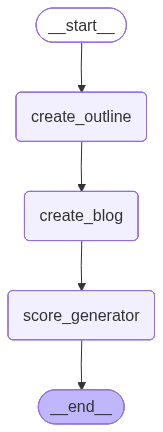

In [8]:
graph=StateGraph(blogstate)

#add nodes:
graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)
graph.add_node('score_generator',score_generator)


#add edges:
graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog','score_generator')
graph.add_edge('score_generator',END)

graph.compile()

In [9]:
workflow=graph.compile()

In [10]:
inital_state={'title':'history of nepal'}
final_state=workflow.invoke(inital_state)
print(final_state)

{'title': 'history of nepal', 'outline': AIMessage(content="## History of Nepal: A Detailed Outline\n\nThis outline covers the history of Nepal from its ancient origins to the present day, broken down into distinct periods with key events, socio-political structures, and cultural developments.\n\n**I. Ancient Period (Pre-Lichhavi - roughly before 300 CE)**\n\n*   **A. Mythological Origins & Early Settlements (Before 800 BCE)**\n    *   Legend of the Kathmandu Valley's creation & early Newar settlements.\n    *   Influence of Vedic & Hindu traditions migrating from India.\n    *   Early archaeological evidence of settlements – possible Kirat presence.\n    *   Focus on oral traditions & limited written records.\n*   **B. The Kirat Dynasty (800 BCE - 300 CE)**\n    *   Dominance of the Kirat people in the Kathmandu Valley and surrounding areas.\n    *   Evidence from the *Nepal Mahatmyam* (religious text).\n    *   Possible trade links with India & Tibet.\n    *   Characterized by tribal

In [11]:
print(final_state['title'])

history of nepal


In [12]:
print(final_state['outline'].content)

## History of Nepal: A Detailed Outline

This outline covers the history of Nepal from its ancient origins to the present day, broken down into distinct periods with key events, socio-political structures, and cultural developments.

**I. Ancient Period (Pre-Lichhavi - roughly before 300 CE)**

*   **A. Mythological Origins & Early Settlements (Before 800 BCE)**
    *   Legend of the Kathmandu Valley's creation & early Newar settlements.
    *   Influence of Vedic & Hindu traditions migrating from India.
    *   Early archaeological evidence of settlements – possible Kirat presence.
    *   Focus on oral traditions & limited written records.
*   **B. The Kirat Dynasty (800 BCE - 300 CE)**
    *   Dominance of the Kirat people in the Kathmandu Valley and surrounding areas.
    *   Evidence from the *Nepal Mahatmyam* (religious text).
    *   Possible trade links with India & Tibet.
    *   Characterized by tribal governance and shamanistic practices.
    *   Yalambar considered a signif

In [13]:
print(final_state['content'])

## History of Nepal: A Detailed Outline

Nepal, a landlocked nation nestled in the Himalayas, boasts a rich and complex history stretching back millennia. From mythological origins and ancient kingdoms to a unified nation and modern republic, its story is woven with threads of religion, conquest, and cultural resilience. This blog post will delve into the detailed history of Nepal, broken down into distinct periods as outlined below.

**I. Ancient Period (Pre-Lichhavi - roughly before 300 CE)**

The early history of Nepal is shrouded in myth and legend, relying heavily on oral traditions and archaeological interpretations. Written records are scarce, making it a challenging period to reconstruct with certainty.

**A. Mythological Origins & Early Settlements (Before 800 BCE)**

The Kathmandu Valley, the heartland of Nepal, is steeped in mythology.  Legends speak of the valley being a vast lake drained by a bodhisattva, Manjushri, to create a habitable land for humans.  While fantastical

In [14]:
print(final_state['score'])

I'd give this a **9/10**.

Here's why:

* **Excellent Expansion & Clarity:** The content takes the outline and *expands* on it beautifully. It doesn't just re-state the points, but adds context, explanations, and interesting details (like the Manjushri legend, the origin of the Newars, and Yalambar's connection to the Mahabharata). It's very readable and engaging.
* **Strong Historical Grounding:** The content acknowledges the limitations of historical sources (lack of written records in the early periods) and frames the information appropriately. It also correctly points out the syncretic nature of Nepalese religion.
* **Well-Organized:**  The content follows the outline perfectly, making it easy to understand the structure and flow of Nepal's early history.
* **Good Detail:** The level of detail is appropriate for an introductory overview - it provides enough information to be informative without being overwhelming.

**Minor areas for potential improvement (the reason it's not a 10/1